<a href="https://colab.research.google.com/github/aslam7861/Python/blob/main/Copy_of_1_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas DataFrames

Pandas DataFrames are mutable two-dimensional structures of data with labeled axes where: 
* each row represents a different observation
* each column represents a different variable

As always, we first need to import the Pandas module:

In [100]:
import pandas as pd

Next, if we want a DataFrame with 5 rows and 2 columns, we can do it from a [dictionary](https://www.w3schools.com/python/python_dictionaries.asp), a [list](https://www.w3schools.com/python/python_lists.asp) of lists, a list of dictionaries, etc.

We are going to create a 5 row, 2 column DataFrame from a dictionary. To do this, we will follow these steps:

1. Create a dictionary where the keys will be the names of the columns and the values will be lists, with as many elements as the number of rows we want.
2. Convert that dictionary to dataframe with pandas' `pd.DataFrame()` function.

In [101]:
# 1. Create the dictionary
data = {
    "x":[1, 2, 3, 4, 5], 
    "y":[6, 7, 8, 9, 10]
}

In [102]:
data['x']

[1, 2, 3, 4, 5]

In [103]:
# 2. Convert dictionary to dataframe
df = pd.DataFrame(data)
print(df)
# df

   x   y
0  1   6
1  2   7
2  3   8
3  4   9
4  5  10


As we said, we have created a dataframe with 5 rows and two columns, called x and y respectively.

**Observation**: As a result of `print()`, we have not only obtained the 5 rows and 2 columns, but there is an additional "column" of 5 numbers ordered vertically from 0 to 4. This column is called the **index** and it is simply the name of each row, which by default is their ordinal position: 0 indicates the first row; the 1, the second; and so on.

## Import a csv file to dataframe

Most of the time, you will not be creating dataframes yourself, but importing (or "reading") data from a csv file or a database into a pandas dataframe. It's easy to do with pandas' read functions:

In [104]:
url = 'https://drive.google.com/file/d/1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG/view?usp=sharing' # orderlines.csv
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

## Dataframe dimensions

With the `.shape` attribute we can calculate the dimensions (number of rows and columns) of the dataframe.

In [105]:
df.shape

(293983, 7)

As a result we obtain a [tuple](https://www.w3schools.com/python/python_tuples.asp) where the first element is the number of rows, which in our case is 293983, while the second element is the number of columns, which in our example was 7.

In [106]:
nrows = df.shape[0]
ncols = df.shape[1]
print("The number of rows is", nrows)
print("The number of columns is", ncols)

The number of rows is 293983
The number of columns is 7


`DataFrame.size` returns the total number of values that the dataframe has (the number of rows multiplied by the number of columns):

In [107]:
df.size

2057881

In [108]:
# check if that's true
df.shape[0] * df.shape[1] == df.size

True

With the `.ndim` attribute we calculate the number of dimensions that the dataframe has. This will always be 2, as it consists of rows and columns.

In [109]:
df.ndim

2

## Dataframes exploration

The `DataFrame.head()` and `DataFrame.tail()` methods are used to display the first or last rows of the dataframe. Looking at the raw data is a great way to get a grasp of what's in there. By default, 5 rows will be shown, but you can change that:

In [110]:
df.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


In [111]:
df.head(9)

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
5,1119114,295310,0,10,WDT0249,231.79,2017-01-01 01:14:27
6,1119115,299544,0,1,APP1582,1.137.99,2017-01-01 01:17:21
7,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
8,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34


In [112]:
df.tail()

,id,id_order,product_id,product_quantity,sku,unit_price,date
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01
293982,1650203,527401,0,1,APP0927,13.99,2018-03-14 13:58:36


The methods `DataFrame.info()`, `DataFrame.describe()` and `DataFrame.nunique()` give a general overview of what's in the dataframe:

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


In [114]:
df.describe()

,id,id_order,product_id,product_quantity
count,2.939830e+05,293983.000000,293983.0,293983.000000
mean,1.397918e+06,419999.116544,0.0,1.121126
std,1.530096e+05,66344.486479,0.0,3.396569
min,1.119109e+06,241319.000000,0.0,1.000000
25%,1.262542e+06,362258.500000,0.0,1.000000
50%,1.406940e+06,425956.000000,0.0,1.000000
75%,1.531322e+06,478657.000000,0.0,1.000000
max,1.650203e+06,527401.000000,0.0,999.000000


In [115]:
df.id.count()
df.iloc[:, 0:4].head()


,id,id_order,product_id,product_quantity
0,1119109,299539,0,1
1,1119110,299540,0,1
2,1119111,299541,0,1
3,1119112,299542,0,1
4,1119113,299543,0,1


In [116]:
df.set_index("id", inplace=True)


In [117]:
df.head(3)

,id_order,product_id,product_quantity,sku,unit_price,date
id,,,,,,
1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57


In [118]:
df.reset_index(inplace=True)
df.head(3)

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57


In [119]:
df.nunique()

id                  293983
id_order            204855
product_id               1
product_quantity        67
sku                   7951
unit_price           11329
date                251631
dtype: int64

The `.unique()` method returns the unique values from a column as a numpy array, which can be indexed with `[]`:

In [120]:
df['sku'].unique()[:10]

array(['OTT0133', 'LGE0043', 'PAR0071', 'WDT0315', 'JBL0104', 'WDT0249',
       'APP1582', 'OWC0100', 'IOT0014', 'APP0700'], dtype=object)

The `isna()` method returns a boolean for each value: `True` if that value is "missing" (which is represented as `NaN` in numpy and pandas) and `False` if the value is not missing:

In [121]:
df.isna()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
293978,False,False,False,False,False,False,False
293979,False,False,False,False,False,False,False
293980,False,False,False,False,False,False,False
293981,False,False,False,False,False,False,False


We can then use `DataFrame.sum()` to add up all these booleans for each column, and count how many missing values are there in the dataframe, since `True` is interpreted as `1` and `False` as `0`:

In [122]:
df.isna().sum()

id                  0
id_order            0
product_id          0
product_quantity    0
sku                 0
unit_price          0
date                0
dtype: int64

`DataFrame.duplicated()` also returns a boolean output, but in this case just one value per row: `True` if that row is duplicated and `False` if it's not. Again, using `sum()` allows us to count how many `True` values (i.e. duplicated rows) are there in total:

In [123]:
df.duplicated().sum() # parameters keep=False
# df.drop_duplicates()

0

`DataFrame.nlargest(n, columns)` will return the top `n` rows with the largest value for whatever column we specify in `columns`. Below, we see the rows with the largest product quantity values:

In [124]:
df.nlargest(5, 'product_quantity')

,id,id_order,product_id,product_quantity,sku,unit_price,date
53860,1228150,346221,0,999,APP1190,55.99,2017-04-14 21:50:52
68712,1254032,358747,0,999,SEV0028,19.99,2017-05-24 14:51:58
57796,1234924,349475,0,800,KIN0137,7.49,2017-04-25 09:59:00
57306,1234111,349133,0,555,APP0665,70.99,2017-04-24 10:20:13
40813,1204788,335057,0,201,THU0029,80.99,2017-03-14 15:25:53


 `DataFrame.nsmallest()` does the same, for the smallest values:

In [125]:
df.nsmallest(5, 'product_quantity')

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


So far, we have seen two ways to explore DataFrames:

* `.shape`, `.size` and `.ndim`, among others, are **atributes**. They are written without parentheses and give you raw "metadata" about the DataFrame you are calling them on.
* `.head()`, `.describe()` and `.isna()`, among others, are **methods**. They are written with parentheses and perform some sort of calculation, transformation or aggregation. A method is like a function that is tied to a specific object type.

DataFrames have a lot of attributes and methods and may not be obvious whether something belongs to one type or the other. Whenever in doubt, check [the documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html?highlight=dataframe#pandas.DataFrame). If you scroll down past the list of examples you will find two sections listing all the attributes and methods.

## Columns

Given a DataFrame, we can select a particular column in several ways:

* Indicating the name of the column between square brackets, `[]`
* With the `.loc[]` attribute (by name or tag)
* With the `.iloc[]` attribute (by position)

Plain square brackets `[]` are used to just view a column if you know its name and **don't want to modify it**:

In [126]:
# select the column by name
df['id_order']

0         299539
1         299540
2         299541
3         299542
4         299543
           ...  
293978    527398
293979    527399
293980    527400
293981    527388
293982    527401
Name: id_order, Length: 293983, dtype: int64

`.loc[]` takes two arguments: `[rows, columns]`. Passing `:` to the rows argument means "grabbing all the rows", which allows you to select a whole column if you know its name. This method is more flexible as you will see in the future, and allows you to modify the data.

In [127]:
# method .loc[]
df.loc[:, 'id_order']

0         299539
1         299540
2         299541
3         299542
4         299543
           ...  
293978    527398
293979    527399
293980    527400
293981    527388
293982    527401
Name: id_order, Length: 293983, dtype: int64

`iloc[]` works similarly, but only accepts integers (which represent the positions of the rows and columns):

In [128]:
# method .iloc[]
print(df.iloc[:, 0])

0         1119109
1         1119110
2         1119111
3         1119112
4         1119113
           ...   
293978    1650199
293979    1650200
293980    1650201
293981    1650202
293982    1650203
Name: id, Length: 293983, dtype: int64


### Select multiple columns

If we want to select more than one column, we can do it with all the options listed above, with slight modifications in some cases:

In [129]:
# note that we pass a list inside of the []
df[['id_order','sku']]

,id_order,sku
0,299539,OTT0133
1,299540,LGE0043
2,299541,PAR0071
3,299542,WDT0315
4,299543,JBL0104
...,...,...
293978,527398,JBL0122
293979,527399,PAC0653
293980,527400,APP0698
293981,527388,BEZ0204


In [130]:
# .loc()
df.loc[:, ["id_order", "sku"]]

,id_order,sku
0,299539,OTT0133
1,299540,LGE0043
2,299541,PAR0071
3,299542,WDT0315
4,299543,JBL0104
...,...,...
293978,527398,JBL0122
293979,527399,PAC0653
293980,527400,APP0698
293981,527388,BEZ0204


With `.loc[]` and `:` you can select all columns between two columns you specify.

In [131]:
# .loc()
df.loc[:, "id_order":"sku"]

,id_order,product_id,product_quantity,sku
0,299539,0,1,OTT0133
1,299540,0,1,LGE0043
2,299541,0,1,PAR0071
3,299542,0,1,WDT0315
4,299543,0,1,JBL0104
...,...,...,...,...
293978,527398,0,1,JBL0122
293979,527399,0,1,PAC0653
293980,527400,0,2,APP0698
293981,527388,0,1,BEZ0204


In [132]:
# .iloc
df.iloc[:, [0, 1]]

,id,id_order
0,1119109,299539
1,1119110,299540
2,1119111,299541
3,1119112,299542
4,1119113,299543
...,...,...
293978,1650199,527398
293979,1650200,527399
293980,1650201,527400
293981,1650202,527388


In [133]:
df.iloc[:, 0:2]

,id,id_order
0,1119109,299539
1,1119110,299540
2,1119111,299541
3,1119112,299542
4,1119113,299543
...,...,...
293978,1650199,527398
293979,1650200,527399
293980,1650201,527400
293981,1650202,527388


## Rows

Selecting rows is easy if you know how to select columns. You have two options:

* With `.loc[]` (by name or tag)
* With `.iloc[]` (by position)

Selecting a single row returns a pandas Series (the 1-dimensional object that pandas has):

In [134]:
df.loc[0]

id                              1119109
id_order                         299539
product_id                            0
product_quantity                      1
sku                             OTT0133
unit_price                        18.99
date                2017-01-01 00:07:19
Name: 0, dtype: object

With `.loc[]`, rows are selected by its index name:

In [135]:
df.loc[0:3]

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40


If we change the index and set it to the `id` column, now the first rows can not be selected the same way:

In [136]:
df.set_index('id', inplace=True)
# inplace = True is the same as doing df = df.set_index('id'), i.e. it modifies the dataframe

In [137]:
df.loc[0:3]

,id_order,product_id,product_quantity,sku,unit_price,date
id,,,,,,


In [138]:
df.head(2)

,id_order,product_id,product_quantity,sku,unit_price,date
id,,,,,,
1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45


In [139]:
# select the first observation with the .loc() method
df.loc[1119110]

id_order                         299540
product_id                            0
product_quantity                      1
sku                             LGE0043
unit_price                       399.00
date                2017-01-01 00:19:45
Name: 1119110, dtype: object

With the `iloc[]` method we don't need to know the row names to select rows at a certain position:

In [140]:
df.iloc[0:3]

,id_order,product_id,product_quantity,sku,unit_price,date
id,,,,,,
1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57


In [141]:
# select the last observation with the method .iloc[]
df.iloc[-1]
# df.tail(1)

id_order                         527401
product_id                            0
product_quantity                      1
sku                             APP0927
unit_price                        13.99
date                2018-03-14 13:58:36
Name: 1650203, dtype: object

In [142]:
df.loc[[1119111,1119112,1119113]]

,id_order,product_id,product_quantity,sku,unit_price,date
id,,,,,,
1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


Again, using `:` you can select all elements between the two that you specified:

In [143]:
df.loc[1119111:1119113]

,id_order,product_id,product_quantity,sku,unit_price,date
id,,,,,,
1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


In [144]:
df.reset_index(inplace=True)

Indexing can get tricky sometimes, it's ok to take some time to get used to the methods we presented, and it's ok to have some trouble selecting the rows and columns you need. For an exhaustive guide on Pandas indexing, check out this link: https://pandas.pydata.org/docs/user_guide/indexing.html#indexing 

## Drop and Filter data

The `.drop()` method allows us to delete the rows or columns that we indicate.

**Note:** Again, if we want to directly apply the changes to the original dataframe, we need to indicate `inplace = True`. Otherwise, we are getting as an output just a "view" of how the dataframe looks like after the drop, but the original dataframe remains untouched.

In [145]:
# droping the column "unit_price"
# axis=1 means we want to drop a column, not a row (for rows, axis=0)
df.drop(['unit_price'], axis=1)

,id,id_order,product_id,product_quantity,sku,date
0,1119109,299539,0,1,OTT0133,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,2017-01-01 01:06:38
...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,2018-03-14 13:57:25
293979,1650200,527399,0,1,PAC0653,2018-03-14 13:57:34
293980,1650201,527400,0,2,APP0698,2018-03-14 13:57:41
293981,1650202,527388,0,1,BEZ0204,2018-03-14 13:58:01


How to filter information on a dataframe.

In [146]:
# rows with product quantity larger than 100
df.loc[df['product_quantity'] > 100, :]

,id,id_order,product_id,product_quantity,sku,unit_price,date
27779,1180010,323959,0,126,ADN0039,34.99,2017-02-14 10:21:12
40813,1204788,335057,0,201,THU0029,80.99,2017-03-14 15:25:53
53860,1228150,346221,0,999,APP1190,55.99,2017-04-14 21:50:52
57306,1234111,349133,0,555,APP0665,70.99,2017-04-24 10:20:13
57796,1234924,349475,0,800,KIN0137,7.49,2017-04-25 09:59:00
68712,1254032,358747,0,999,SEV0028,19.99,2017-05-24 14:51:58
136675,1388261,417536,0,200,TRK0009,29.99,2017-10-25 15:02:39
204637,1500715,464858,0,192,APP1662,519.00,2017-12-17 15:53:04
246048,1574262,496172,0,164,EVU0013,19.99,2018-01-22 16:14:42
285492,1637611,522075,0,125,XDO0047,25.99,2018-03-06 10:07:54


In [211]:
df.query('product_quantity > 100').head(4)

,id,id_order,product_id,product_quantity,sku,unit_price,date
27779,1180010,323959,0,126,ADN0039,34.99,2017-02-14 10:21:12
40813,1204788,335057,0,201,THU0029,80.99,2017-03-14 15:25:53
53860,1228150,346221,0,999,APP1190,55.99,2017-04-14 21:50:52
57306,1234111,349133,0,555,APP0665,70.99,2017-04-24 10:20:13


The `.query()` method can be useful for this purpose, as it resembles SQL syntax. Note that it works only when the column values do not contain blank spaces. You can use any **Python Comparison Operators** you want inside the query method (find more information on this [link](https://www.w3schools.com/python/python_operators.asp)).

In [147]:
df.query('product_quantity > 100')

,id,id_order,product_id,product_quantity,sku,unit_price,date
27779,1180010,323959,0,126,ADN0039,34.99,2017-02-14 10:21:12
40813,1204788,335057,0,201,THU0029,80.99,2017-03-14 15:25:53
53860,1228150,346221,0,999,APP1190,55.99,2017-04-14 21:50:52
57306,1234111,349133,0,555,APP0665,70.99,2017-04-24 10:20:13
57796,1234924,349475,0,800,KIN0137,7.49,2017-04-25 09:59:00
68712,1254032,358747,0,999,SEV0028,19.99,2017-05-24 14:51:58
136675,1388261,417536,0,200,TRK0009,29.99,2017-10-25 15:02:39
204637,1500715,464858,0,192,APP1662,519.00,2017-12-17 15:53:04
246048,1574262,496172,0,164,EVU0013,19.99,2018-01-22 16:14:42
285492,1637611,522075,0,125,XDO0047,25.99,2018-03-06 10:07:54


The `isin()` method is very useful to find rows that match any of the values you have in a list. For example, here we are searching for rows where its `sku` matches any of the 2 sku's we listed:

In [148]:
# find out a column that contains a list
df['sku'].isin(['JBL0104', 'ADN0039'])

0         False
1         False
2         False
3         False
4          True
          ...  
293978    False
293979    False
293980    False
293981    False
293982    False
Name: sku, Length: 293983, dtype: bool

This expression can be used inside of `[]` or `.loc[]` to filter the rows that have a `True` value. This is called "boolean indexing" and it is really useful:

In [149]:
my_products = df['sku'].isin(['JBL0104', 'ADN0039'])

df.loc[my_products, :]

,id,id_order,product_id,product_quantity,sku,unit_price,date
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
716,1120463,300212,0,2,JBL0104,26.99,2017-01-02 01:44:05
774,1120607,300272,0,1,JBL0104,24.99,2017-01-02 08:57:07
866,1120758,300349,0,1,JBL0104,24.99,2017-01-02 10:41:29
1411,1122014,300851,0,1,JBL0104,24.99,2017-01-02 18:50:13
1451,1122093,300887,0,1,JBL0104,24.99,2017-01-02 19:14:43
3612,1130604,302848,0,1,JBL0104,24.99,2017-01-05 00:29:26
4370,1132185,303586,0,1,JBL0104,22.31,2017-01-06 12:57:24
7028,1137895,305980,0,1,ADN0039,34.99,2017-01-09 19:37:45
8450,1140943,307256,0,1,JBL0104,26.99,2017-01-11 13:13:21


Pandas compresses large outputs in Colab/Jupyter Notebooks. If you want to see more rows, you can change the options:

In [150]:
pd.options.display.max_rows = 100
# after running this cell, run the code above again and you will see all the rows.

For a complete list of all settings and options that can be tweaked, check out this: https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

#### Modifying a dataframe & the `.copy()` method

Let's take a small chunk of data from our dataframe:

In [151]:
sample = df.iloc[:3,:]
sample

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57


Now we pick a single cell from the sample we took and we assign a new value to it. A warning already tells us that this is a risky thing to do:

In [152]:
# we change the "unit_price" of the first row:
sample.iloc[0,4] = 'NEW VALUE HERE'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


We can see the new value on the `sample` we took:

In [153]:
sample

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,NEW VALUE HERE,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57


..and, maybe to your surprise, we can see that the new value is also present on the original `df`!

In [154]:
df.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,NEW VALUE HERE,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


When you take a chunk of data using `.loc[]` or `iloc[]` and assign it to a new object, the new object is just a "tag" pointing to the very same data as the original dataframe points to. We can avoid this using the method `.copy()`

In [155]:
url = 'https://drive.google.com/file/d/14Y7g5ITyf6LMyPoKc9wr010V9StaCUux/view?usp=sharing' # orderlines.csv
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

sample = df.iloc[:3,:].copy()
sample.iloc[0,4] = 'NEW VALUE HERE'
sample

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,NEW VALUE HERE,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57


In [156]:
df.head(3)

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57


As you can see, now it has not been modified.

# CHALLENGES

1. How many different unit prices does the product with the sku JBL0104 have? Combine a pandas filter method with the method `.nunique()`.

In [157]:
# code here
filter= df["sku"]== 'JBL0104'
df.loc[filter, :].unit_price.nunique()


7

In [212]:
df.loc[df['sku'] == 'JBL0104', 'unit_price'].nunique()

7

In [158]:
df.loc[df['sku'].isin(['JBL0104'])].nunique()

id                  58
id_order            58
product_id           1
product_quantity     2
sku                  1
unit_price           7
date                58
dtype: int64

In [159]:
df.loc[df['sku']=='JBL0104', 'unit_price'].nunique()

7

In [160]:
df.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


2. List the (unique) items that were sold in the order with the id_order 385921.

In [161]:
# code here
#ll=df[df['id_order']==385921]

df.loc[df['id_order' ]==385921].sku.nunique()

19

In [213]:
df.loc[df['id_order'].isin([385921]), 'sku'].nunique()


19

3. Consider the products with the sku's APP2431 and APP2348. Find out in how many orders were they present.

In [162]:
## code here
#df.loc[df['sku' ].isin(['APP2431', 'APP2348'])#
#df.loc[df['sku' ]== 'APP2431' | df['sku'] =='APP2348'].nunique()
df[df['sku'].isin(['APP2431', 'APP2348'])].id_order.nunique()

179

In [214]:
df.query('sku == ["APP2431","APP2348"]')['id_order'].nunique()


179

In [163]:
df[df['sku'].isin(['APP2431', 'APP2348'])].nunique()

id                  189
id_order            179
product_id            1
product_quantity      4
sku                   2
unit_price           22
date                189
dtype: int64

Overlapped id_order with both sku's

In [193]:
pd.merge(
        left= df[['id_order','sku']].loc[df['sku']=='APP2431'],
        right= df[['id_order','sku']].loc[df['sku']=='APP2348'],
        how='inner',
        on = 'id_order'
)['id_order'].count()

10

In [203]:
df_new = df.loc[df['sku'].isin(["APP2431","APP2348"]), ['id_order','sku']].groupby(['id_order'])['id_order'].count().to_frame()
df_new.loc[df_new['id_order']==2,:].count()

id_order    10
dtype: int64

4. Create a new dataframe, `df_50`, with all the rows that have a product quantity higher than 500 and only the columns `id`, id `order`, `product_quantity` and `sku`. Be sure to use the method `.copy()`. Once the new dataframe is created, modify the column 'product_quantity' to 'quantity', and 'sku' to 'product_code'. To do so, you can use the method `.rename()` or assign a list of new names to the attribute `.columns`.

In [209]:
# code here
df_50 = df.loc[df['product_quantity']>500,['id', 'id_order', 'product_quantity', 'sku']].copy()
df_50.rename(columns={'product_quantity':'quantity', 'sku':'product_code'}).head(3)



,id,id_order,quantity,product_code
53860,1228150,346221,999,APP1190
57306,1234111,349133,555,APP0665
57796,1234924,349475,800,KIN0137


In [210]:
(
  df
  # filtering
 .loc[df['product_quantity'] > 500, ['id', 'id_order', 'product_quantity', 'sku']]
 # renaming
 .rename(columns={'product_quantity':'quantity', 'sku':'product_code'})
).head(5)

,id,id_order,quantity,product_code
53860,1228150,346221,999,APP1190
57306,1234111,349133,555,APP0665
57796,1234924,349475,800,KIN0137
68712,1254032,358747,999,SEV0028


5. Filter all the order lines where the product with the sku XDO0047 has appeared. Sort the rows by their product quantity using the [`.sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) method from pandas, in a DESCENDING order. Then look at the main descriptive information of this results with the method `.describe()`.

In [173]:
# code here
df.loc[df['sku']=='XDO0047',].sort_values(by='product_quantity', ascending= False).head(3)



,id,id_order,product_id,product_quantity,sku,unit_price,date
285492,1637611,522075,0,125,XDO0047,25.99,2018-03-06 10:07:54
203932,1499415,464239,0,2,XDO0047,25.99,2017-12-16 09:36:51
124018,1365515,406387,0,1,XDO0047,23.39,2017-09-29 17:09:32


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f673e2215d0>,
      dtype=object)

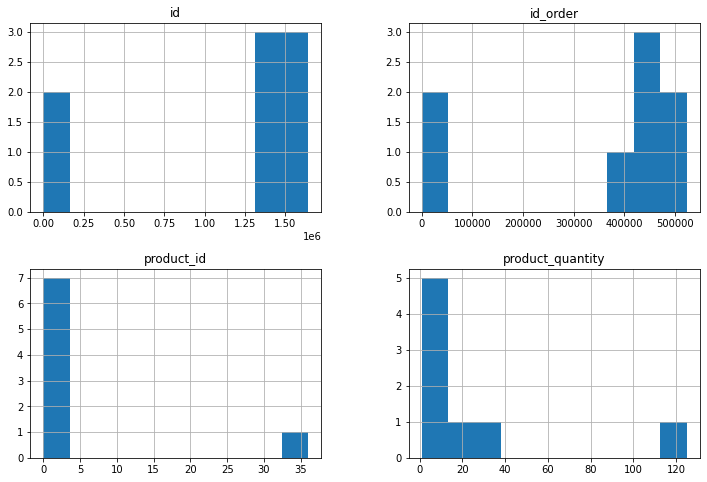

In [180]:
# code here
df.loc[df['sku']=='XDO0047',].sort_values(by='product_quantity', ascending= False).describe().hist(figsize=(12,8))


Explore the other dataframes orders, brands, products

In [181]:
import pandas as pd


# orders.csv
url = 'https://drive.google.com/file/d/1BLEHcP-9fm9Rv7A01H3co2XBMnSr66YC/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

# brands.csv
url = 'https://drive.google.com/file/d/1BrNrIY0F1LbyXtyaQygUBXVxQGB3JBqx/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)

# products.csv
url = 'https://drive.google.com/file/d/1UfsHI80cpQqGfsH2g4T4Tsw8cWayOfzC/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)

In [182]:
orders.sample(3)

,order_id,created_date,total_paid,state
64673,364218,2017-06-10 14:00:22,463.99,Pending
157572,457796,2017-12-08 17:44:02,333.98,Completed
111044,410630,2017-10-09 20:24:43,2371.59,Shopping Basket


In [183]:
brands.sample(3)

,short,long
159,SYN,Synology
49,HGD,Henge Docks
32,DVI,Devia


In [184]:
products.sample(3)

,sku,name,desc,price,promo_price,in_stock,type
15065,CRU0050,Crucial MX300 275GB SSD Disk,SSD 275GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,98.39,909.944,0,12215397
323,OWC0013,OWC Kit of 5 tools for Mac and PC,Kit of 5 tools for repair / extension Mac.,6.99,29.899,1,14305406
8114,APP1274,"Apple iMac 21.5 ""Core i5 31Ghz 4K Retina Displ...",Apple iMac desktop Core i5 21.5-inch Retina di...,1969,18.775.848,0,1282
